We start off by trying out an example CNN on the MNIST data set:

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [5]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [7]:
x_train.shape[0]
y_train.shape

(60000,)

In [4]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
y_train.shape

60000

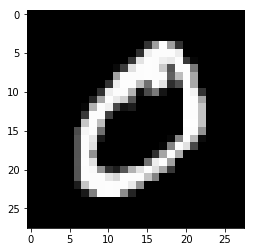

In [21]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1,:,:,0], cmap="gray")
plt.show()

In [32]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
# i.e., convert class value (0, 1, 2,...,9) to a length-10 1-hot vector
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

(60000, 10)

In [45]:
import numpy as np
val_ind = np.random.choice(range(60000), 5000, replace=False)
train_ind = np.setdiff1d(range(60000), val_ind)
x_val = x_train[val_ind,:,:]
x_train = x_train[train_ind,:,:]
y_val = y_train[val_ind,:]
y_train = y_train[train_ind,:]

In [46]:
x_train.shape
y_train.shape

(55000, 10)

In [47]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          verbose=1,
          validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 73s 1ms/step - loss: 1.1950 - acc: 0.6236 - val_loss: 0.3851 - val_acc: 0.8898
Epoch 2/2
55000/55000 [==============================] - 73s 1ms/step - loss: 0.4626 - acc: 0.8573 - val_loss: 0.2860 - val_acc: 0.9140
Test loss: 0.251330964833
Test accuracy: 0.9264


Just to try it out, lets try building a model like this on the letter data.

In [60]:
import glob
G_files = glob.glob('../images/trimmed_queries_divorce/divorce/G/*.png')
y_files = glob.glob('../images/trimmed_queries_divorce/divorce/y/*.png')

label_G = np.zeros(len(G_files)).tolist()
label_y = np.ones(len(y_files)).tolist()

2689

In [72]:
import cv2
G_array = np.ndarray(shape=(len(label_G), 64, 96))
for i, name in enumerate(G_files):
    im = cv2.imread(name)
    G_array[i,:,:] = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    
y_array = np.ndarray(shape=(len(label_y), 64, 96))
for i, name in enumerate(y_files):
    im = cv2.imread(name)
    y_array[i,:,:] = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

In [89]:
G_train_ind = np.random.choice(range(len(label_G)), int(0.8*len(label_G)), replace=False)
G_test_ind = np.setdiff1d(range(len(label_G)), G_train_ind)

y_train_ind = np.random.choice(range(len(label_y)), int(0.8*len(label_y)), replace=False)
y_test_ind = np.setdiff1d(range(len(label_y)), y_train_ind)

G_train = G_array[G_train_ind,:,:]
G_test = G_array[G_test_ind,:,:]
y_train = y_array[y_train_ind,:,:]
y_test = y_array[y_test_ind,:,:]

train_data = np.append(G_train, y_train, axis=0)
test_data = np.append(G_test, y_test, axis=0)

train_label = np.append(np.array(label_G)[G_train_ind], np.array(label_y)[y_train_ind])
test_label = np.append(np.array(label_G)[G_test_ind], np.array(label_y)[y_test_ind])

In [95]:
train_data = train_data.reshape(train_data.shape[0], 64, 96, 1)
test_data = test_data.reshape(test_data.shape[0], 64, 96, 1)

In [97]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64, 96, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

model.fit(train_data, train_label,
          batch_size=50,
          epochs=4,
          verbose=1)
score = model.evaluate(test_data, test_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/4
2151/2151 [==============================] - 29s 14ms/step - loss: 1.8707 - acc: 0.8819
Epoch 2/4
2151/2151 [==============================] - 29s 13ms/step - loss: 1.6231 - acc: 0.8982
Epoch 3/4
2151/2151 [==============================] - 29s 13ms/step - loss: 1.6231 - acc: 0.8982
Epoch 4/4
2151/2151 [==============================] - 29s 14ms/step - loss: 1.6231 - acc: 0.8982
Test loss: 1.6297977179
Test accuracy: 0.897769516729
